In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline

In [2]:
df_train = pd.read_csv('Data_Train.csv')

In [3]:
pd.options.display.max_columns = None

In [4]:
df_train.head()

,ID,Asst_Reg,GGGrade,Experience,Validation,Yearly Income,Home Status,Unpaid 2 years,Already Defaulted,Designation,Debt to Income,Postal Code,Lend Amount,Deprecatory Records,Interest Charged,Usage Rate,Inquiries,Present Balance,Gross Collection,Sub GGGrade,File Status,State,Account Open,Total Unpaid CL,Duration,Unpaid Amount,Reason,Claim Type,Due Fee,Loan/No Loan
0,95074,421802,II,>10yrs,Vfied,633600.00,MOR??AGE,0,0,GLENDALE NISSAN,12.5496,91300.0,42023.25,0,15.39,88.924,3,607161.90,0.0,19,fully paid,California,17,58598.0,3 years,31216.05,debt consolidation,I,0.0,0
1,134131,3964312,IV,7yrs,Source Verified,85483.20,REN?,0,0,Business Teacher,9.0048,27400.0,38133.00,0,9.94,102.856,0,269234.06,0.0,30,whole,NC,15,18924.0,5 years,11660.49,debt consolidation,I,0.0,0
2,92602,4247560,III,<1yr,Source Verified,79200.00,REN?,0,0,driver,24.9144,32800.0,17100.00,0,22.35,60.372,0,22476.53,0.0,25,whole,Florida,7,15604.0,5 years,5637.87,major purchase,I,0.0,0
3,22591,197179,III,<1yr,Vfied,61600.00,REN?,0,0,AvePoint,16.5816,7000.0,5130.00,0,10.36,116.272,1,15242.09,0.0,22,fully paid,NewJersey,9,22410.0,3 years,15607.17,major purchase,I,0.0,1
4,125060,4646684,V,2yrs,Source Verified,68053.92,REN?,0,0,Lead Tester,40.0512,70800.0,19665.00,0,13.68,127.280,1,65433.94,0.0,32,fully paid,LA,10,36022.0,5 years,27472.86,debt consolidation,I,0.0,0


In [5]:
df_train.shape

(87500, 30)

In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87500 entries, 0 to 87499
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   87500 non-null  int64  
 1   Asst_Reg             87500 non-null  int64  
 2   GGGrade              87500 non-null  object 
 3   Experience           87500 non-null  object 
 4   Validation           87500 non-null  object 
 5   Yearly Income        81925 non-null  float64
 6   Home Status          87500 non-null  object 
 7   Unpaid 2 years       87500 non-null  int64  
 8   Already Defaulted    87500 non-null  int64  
 9   Designation          86086 non-null  object 
 10  Debt to Income       84011 non-null  float64
 11  Postal Code          86111 non-null  float64
 12  Lend Amount          87500 non-null  float64
 13  Deprecatory Records  87500 non-null  int64  
 14  Interest Charged     87500 non-null  float64
 15  Usage Rate           87500 non-null 

In [7]:
for i in df_train.columns:
    if df_train[i].dtype == 'object':
        print(i)
        print(df_train[i].unique(),'\n')

GGGrade
['II' 'IV' 'III' 'V' 'VII' 'VI' 'I'] 

Experience
['>10yrs' '7yrs' '<1yr' '2yrs' '1yrs' '4yrs' '9yrs' '6yrs' '5yrs' '8yrs'
 '3yrs'] 

Validation
['Vfied' 'Source Verified' 'Not Vfied'] 

Home Status
['MOR??AGE' 'REN?' 'OWN' 'OTHER' 'NONE'] 

Designation
['GLENDALE NISSAN' 'Business Teacher' 'driver' ... 'Interface Coordinator'
 'PARTS CLERK' 'Outside sales rep'] 

File Status
['fully paid' 'whole'] 

State
['California' 'NC' 'Florida' 'NewJersey' 'LA' 'TX' 'CT' 'MI' 'OR' 'AR'
 'Newyork' 'MT' 'CO' 'Ohio' 'NM' 'MN' 'GA' 'WA' 'Maryland' 'AL' 'SC' 'PA'
 'AZ' 'UT' 'MA' 'VA' 'IL' 'WI' 'NV' 'HI' 'RI' 'TN' 'OK' 'VT' 'IN' 'AK'
 'MO' 'NE' 'NH' 'DC' 'WV' 'MS' 'KY' 'KS' 'DE' 'ND' 'SD' 'WY' 'ME'] 

Duration
['3 years' '5 years'] 

Reason
['debt  consolidation' 'major  purchase' 'other' 'credit  card' 'car'
 'home  improvement' 'small  business' 'moving' 'vacation' 'medical'
 'wedding' 'house' 'renewable  energy'] 

Claim Type
['I' 'J'] 



In [8]:
df_train['GGGrade'] = df_train['GGGrade'].map({'I':1,'II':2,'III':3,'IV':4,'V':5,'VI':6,'VII':7})
df_train['Experience'] = df_train['Experience'].map({'<1yr': 0,'1yrs': 1,'2yrs': 2,'3yrs': 3, '4yrs': 4, '5yrs': 5, '6yrs': 6,
                                                    '7yrs': 7, '8yrs': 8, '9yrs': 9,'>10yrs': 11})
df_train['Validation'] = df_train['Validation'].map({'Vfied':'Verified','Not Vfied': 'Not Verified'})
df_train['Home Status'] = df_train['Home Status'].map({'MOR??AGE': 'MORGAGE','REN?': 'RENT'})
df_train['Duration'] = df_train['Duration'].map({'3 years' : 3,' 5 years': 5})

In [9]:
df_train.dtypes

ID                       int64
Asst_Reg                 int64
GGGrade                  int64
Experience               int64
Validation              object
Yearly Income          float64
Home Status             object
Unpaid 2 years           int64
Already Defaulted        int64
Designation             object
Debt to Income         float64
Postal Code            float64
Lend Amount            float64
Deprecatory Records      int64
Interest Charged       float64
Usage Rate             float64
Inquiries                int64
Present Balance        float64
Gross Collection       float64
Sub GGGrade              int64
File Status             object
State                   object
Account Open             int64
Total Unpaid CL        float64
Duration               float64
Unpaid Amount          float64
Reason                  object
Claim Type              object
Due Fee                float64
Loan/No Loan             int64
dtype: object

In [10]:
df_train.head()

,ID,Asst_Reg,GGGrade,Experience,Validation,Yearly Income,Home Status,Unpaid 2 years,Already Defaulted,Designation,Debt to Income,Postal Code,Lend Amount,Deprecatory Records,Interest Charged,Usage Rate,Inquiries,Present Balance,Gross Collection,Sub GGGrade,File Status,State,Account Open,Total Unpaid CL,Duration,Unpaid Amount,Reason,Claim Type,Due Fee,Loan/No Loan
0,95074,421802,2,11,Verified,633600.00,MORGAGE,0,0,GLENDALE NISSAN,12.5496,91300.0,42023.25,0,15.39,88.924,3,607161.90,0.0,19,fully paid,California,17,58598.0,3.0,31216.05,debt consolidation,I,0.0,0
1,134131,3964312,4,7,NaN,85483.20,RENT,0,0,Business Teacher,9.0048,27400.0,38133.00,0,9.94,102.856,0,269234.06,0.0,30,whole,NC,15,18924.0,NaN,11660.49,debt consolidation,I,0.0,0
2,92602,4247560,3,0,NaN,79200.00,RENT,0,0,driver,24.9144,32800.0,17100.00,0,22.35,60.372,0,22476.53,0.0,25,whole,Florida,7,15604.0,NaN,5637.87,major purchase,I,0.0,0
3,22591,197179,3,0,Verified,61600.00,RENT,0,0,AvePoint,16.5816,7000.0,5130.00,0,10.36,116.272,1,15242.09,0.0,22,fully paid,NewJersey,9,22410.0,3.0,15607.17,major purchase,I,0.0,1
4,125060,4646684,5,2,NaN,68053.92,RENT,0,0,Lead Tester,40.0512,70800.0,19665.00,0,13.68,127.280,1,65433.94,0.0,32,fully paid,LA,10,36022.0,NaN,27472.86,debt consolidation,I,0.0,0


In [11]:
df_train.describe()

,ID,Asst_Reg,GGGrade,Experience,Yearly Income,Unpaid 2 years,Already Defaulted,Debt to Income,Postal Code,Lend Amount,Deprecatory Records,Interest Charged,Usage Rate,Inquiries,Present Balance,Gross Collection,Sub GGGrade,Account Open,Total Unpaid CL,Duration,Unpaid Amount,Due Fee,Loan/No Loan
count,87500.000000,8.750000e+04,87500.000000,87500.000000,8.192500e+04,87500.000000,87500.000000,84011.000000,86111.000000,87500.000000,87500.000000,87500.000000,87500.000000,87500.000000,8.750000e+04,87500.000000,87500.000000,87500.00000,8.331400e+04,60061.0,8.264800e+04,87500.000000,87500.000000
mean,83946.253509,3.798914e+06,2.810686,6.410743,1.348596e+05,0.332937,0.005726,30.942660,51155.385491,25920.535680,0.202400,16.518375,95.517348,0.670640,2.363895e+05,39.461697,22.024891,12.77944,5.326864e+04,3.0,2.955649e+04,0.316407,0.188709
std,36100.102950,2.289038e+06,1.303598,4.056828,9.882473e+04,0.876080,0.083505,14.079813,31211.229930,14433.837213,0.646414,4.902011,40.554035,0.959572,2.550568e+05,391.919578,6.452697,5.37116,5.325551e+04,0.0,3.745625e+04,3.546087,0.391279
min,21560.000000,2.484700e+04,1.000000,0.000000,8.800000e+03,0.000000,0.000000,0.000000,1000.000000,1710.000000,0.000000,8.000000,0.000000,0.000000,0.000000e+00,0.000000,11.000000,2.00000,3.320000e+02,3.0,0.000000e+00,0.000000,0.000000
25%,52616.750000,1.483874e+06,2.000000,3.000000,8.324659e+04,0.000000,0.000000,20.428800,22900.000000,15048.000000,0.000000,12.310000,66.048000,0.000000,5.173493e+04,0.000000,17.000000,9.00000,2.324000e+04,3.0,1.144674e+04,0.000000,0.000000
50%,83900.000000,4.132010e+06,3.000000,7.000000,1.144000e+05,0.000000,0.000000,30.139200,47700.000000,23940.000000,0.000000,16.490000,97.008000,0.000000,1.388062e+05,0.000000,21.000000,12.00000,3.967400e+04,3.0,2.089278e+04,0.000000,0.000000
75%,115261.250000,5.952909e+06,4.000000,11.000000,1.601600e+05,0.000000,0.000000,40.908000,80200.000000,34200.000000,0.000000,20.770000,126.592000,1.000000,3.534755e+05,0.000000,26.000000,16.00000,6.640000e+04,3.0,3.644908e+04,0.000000,0.000000
max,146559.000000,7.351847e+06,7.000000,11.000000,8.264031e+06,18.000000,6.000000,639.290400,99900.000000,59850.000000,86.000000,25.000000,1534.756000,8.000000,5.629234e+06,26308.470000,45.000000,83.00000,1.710630e+06,3.0,1.338778e+06,169.050000,1.000000


In [12]:
df_train.isnull().sum()

ID                         0
Asst_Reg                   0
GGGrade                    0
Experience                 0
Validation             34504
Yearly Income           5575
Home Status             8426
Unpaid 2 years             0
Already Defaulted          0
Designation             1414
Debt to Income          3489
Postal Code             1389
Lend Amount                0
Deprecatory Records        0
Interest Charged           0
Usage Rate                 0
Inquiries                  0
Present Balance            0
Gross Collection           0
Sub GGGrade                0
File Status                0
State                      0
Account Open               0
Total Unpaid CL         4186
Duration               27439
Unpaid Amount           4852
Reason                     0
Claim Type                 0
Due Fee                    0
Loan/No Loan               0
dtype: int64

In [13]:
df_train['Yearly Income'] =  df_train['Yearly Income'].replace(np.NaN,df_train['Yearly Income'].median())
df_train['Debt to Income'] = df_train['Debt to Income'].replace(np.NaN, df_train['Debt to Income'].mean())
df_train['Total Unpaid CL'] = df_train['Total Unpaid CL'].replace(np.NaN,df_train['Total Unpaid CL'].median())
df_train['Unpaid Amount'] = df_train['Unpaid Amount'].replace(np.NaN,df_train['Unpaid Amount'].median())

In [14]:
df_train[df_train['Yearly Income'].isnull()]

,ID,Asst_Reg,GGGrade,Experience,Validation,Yearly Income,Home Status,Unpaid 2 years,Already Defaulted,Designation,Debt to Income,Postal Code,Lend Amount,Deprecatory Records,Interest Charged,Usage Rate,Inquiries,Present Balance,Gross Collection,Sub GGGrade,File Status,State,Account Open,Total Unpaid CL,Duration,Unpaid Amount,Reason,Claim Type,Due Fee,Loan/No Loan


In [15]:
df_train['Designation'].value_counts()

School Teacher             1585
Super Lead                 1322
Nurse                       743
RN                          646
Owner                       623
                           ... 
Driector of Sales             1
southwest credit              1
SR DATA ENTRY CLERK           1
Opps Manager                  1
Sr. Merchandise manager       1
Name: Designation, Length: 40354, dtype: int64

In [16]:
df_train['Designation'] = df_train['Designation'].replace(np.NaN, df_train['Designation'].mode()[0])
df_train['Validation'] = df_train['Validation'].replace(np.NaN,df_train['Validation'].mode()[0])
df_train['Home Status'] = df_train['Home Status'].replace(np.NaN,df_train['Home Status'].mode()[0])
df_train['Duration'] = df_train['Duration'].replace(np.NaN, df_train['Duration'].mode()[0])
df_train['Postal Code'] = df_train['Postal Code'].replace(np.NaN, df_train['Postal Code'].mode()[0])

In [17]:
df_train.isnull().sum()

ID                     0
Asst_Reg               0
GGGrade                0
Experience             0
Validation             0
Yearly Income          0
Home Status            0
Unpaid 2 years         0
Already Defaulted      0
Designation            0
Debt to Income         0
Postal Code            0
Lend Amount            0
Deprecatory Records    0
Interest Charged       0
Usage Rate             0
Inquiries              0
Present Balance        0
Gross Collection       0
Sub GGGrade            0
File Status            0
State                  0
Account Open           0
Total Unpaid CL        0
Duration               0
Unpaid Amount          0
Reason                 0
Claim Type             0
Due Fee                0
Loan/No Loan           0
dtype: int64

<ipython-input-18-46549ca9254d>:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(5,5))


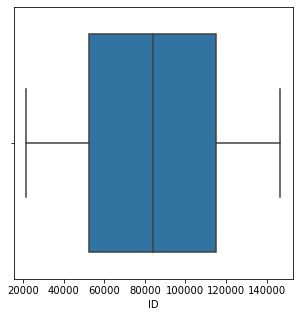

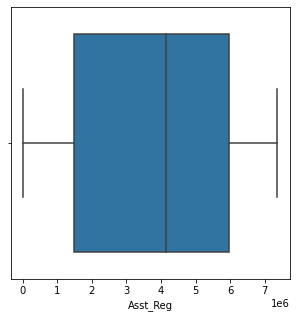

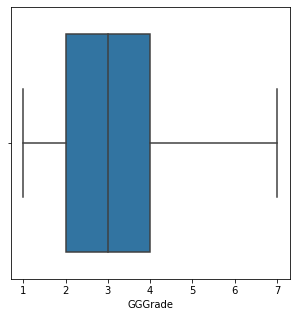

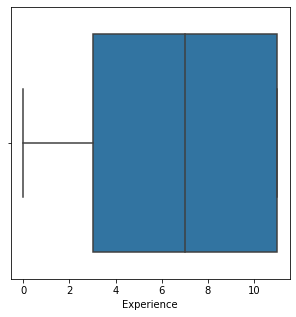

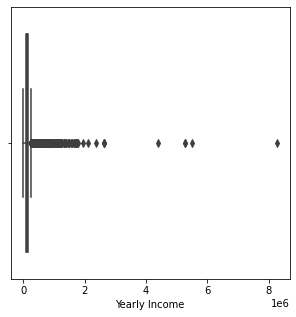

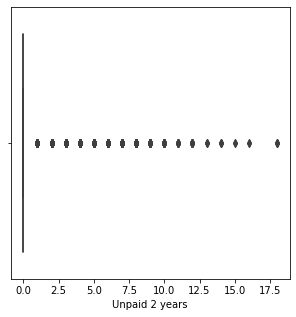

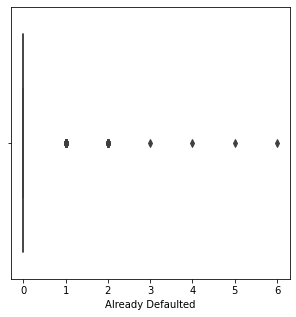

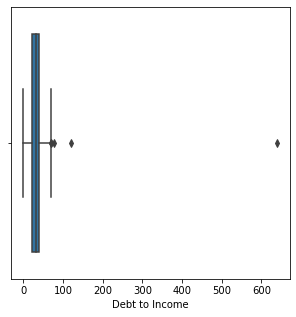

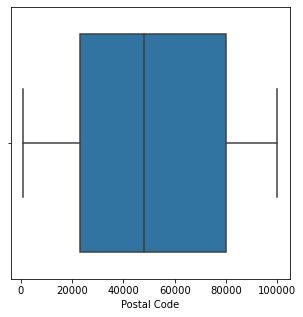

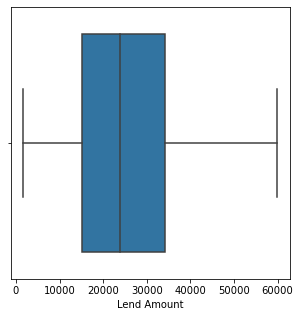

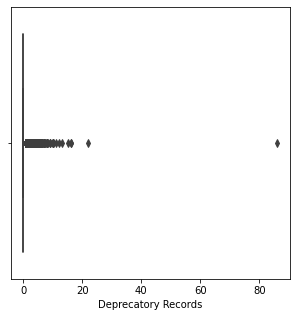

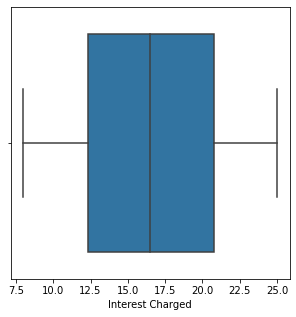

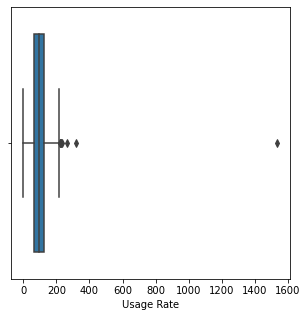

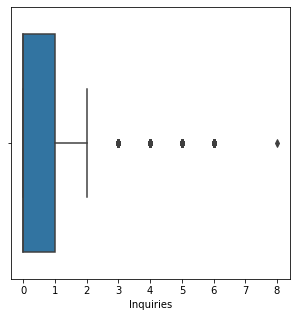

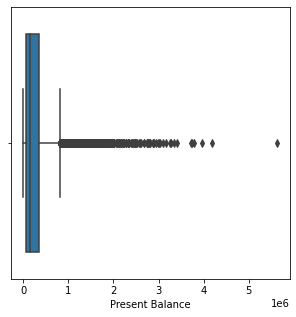

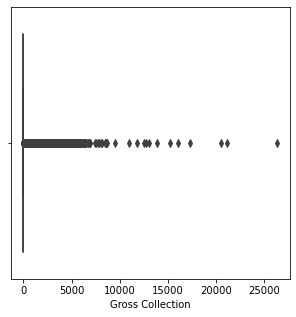

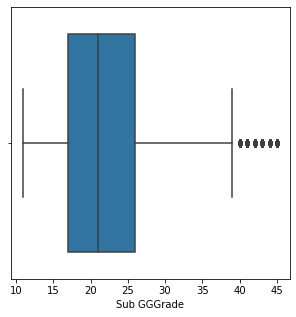

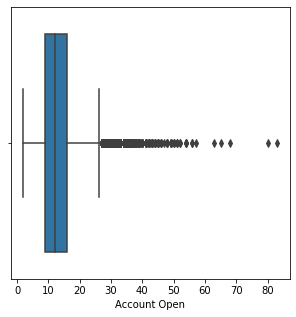

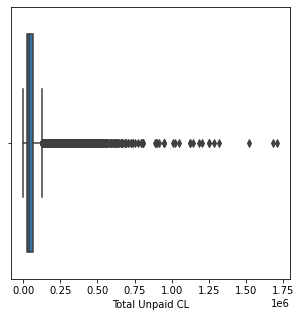

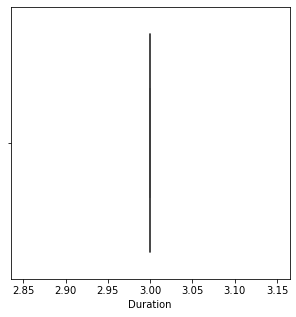

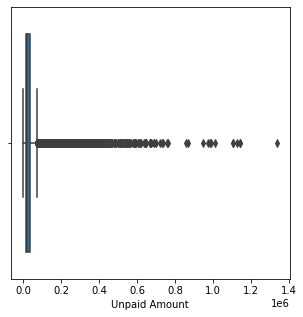

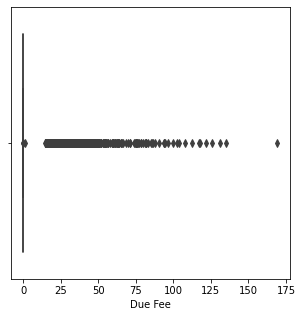

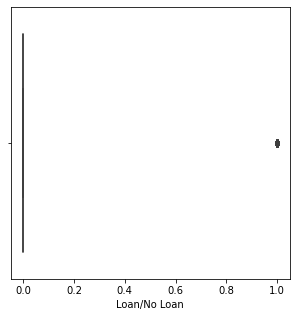

In [18]:
for i in df_train.columns:
    if df_train[i].dtype != 'object':
        plt.figure(figsize=(5,5))
        sns.boxplot(x = df_train[i],data= df_train)

In [19]:
def remove_outliers(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 -Q1
    lr = Q1 - (1.5 * IQR)
    ur = Q3 + (1.5 * IQR)
    return lr, ur 

In [20]:
for i in df_train[['Yearly Income','Debt to Income','Usage Rate','Sub GGGrade','Account Open','Unpaid Amount']]:
    lr, ur = remove_outliers(df_train[i])
    df_train[i] = np.where(df_train[i]< lr, lr, df_train[i])
    df_train[i] = np.where(df_train[i]> ur, ur, df_train[i])

<ipython-input-21-46549ca9254d>:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(5,5))


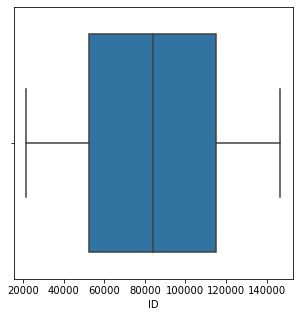

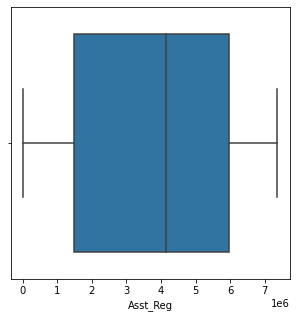

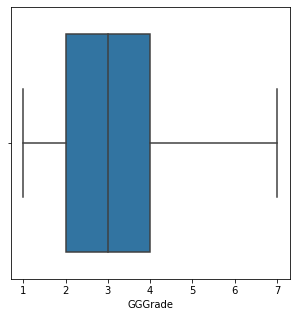

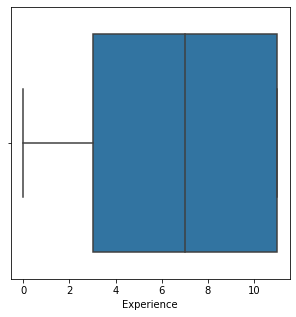

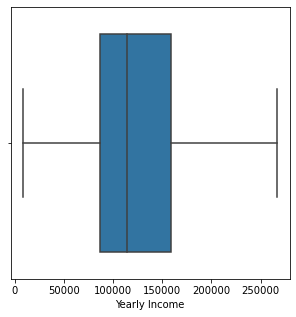

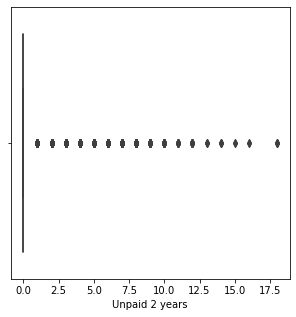

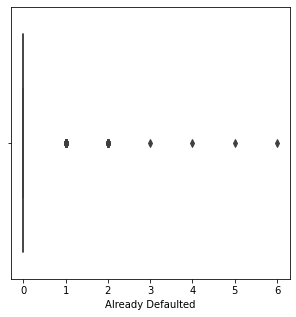

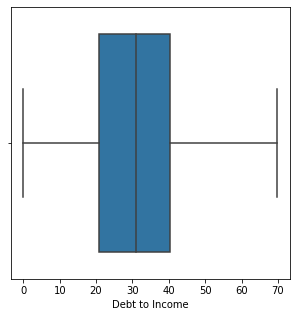

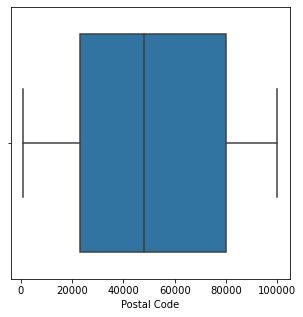

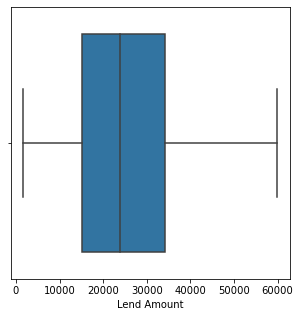

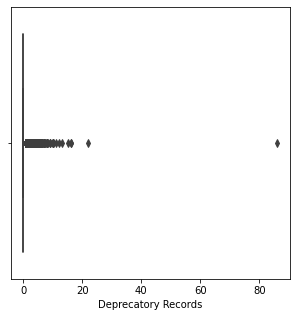

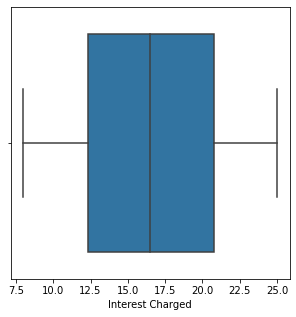

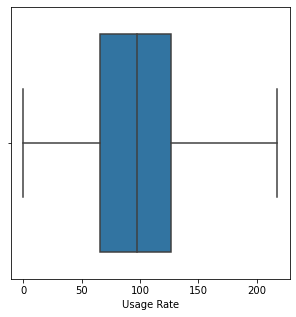

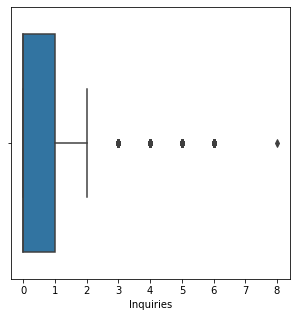

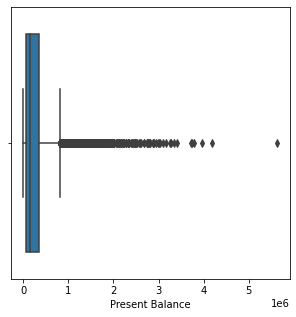

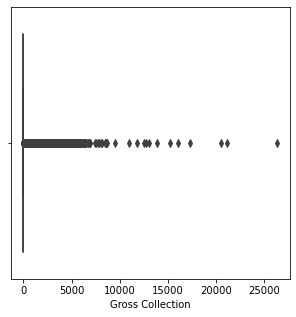

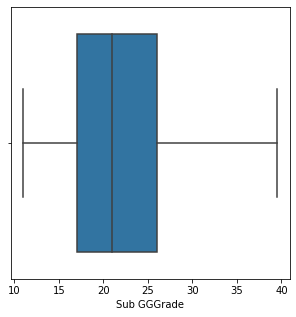

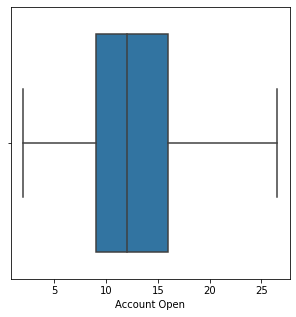

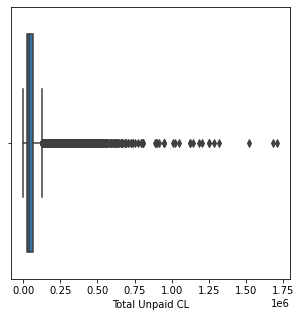

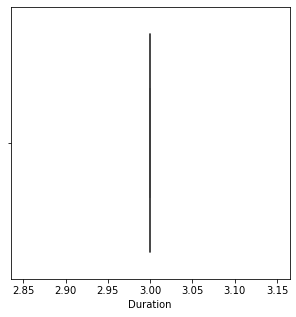

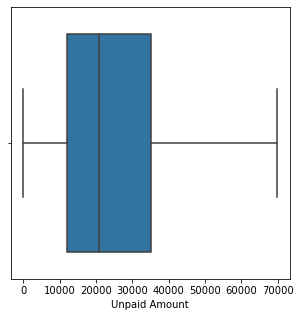

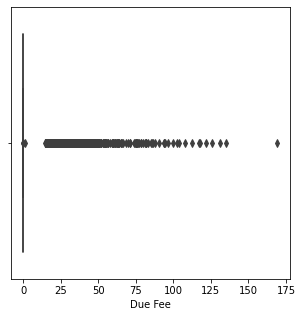

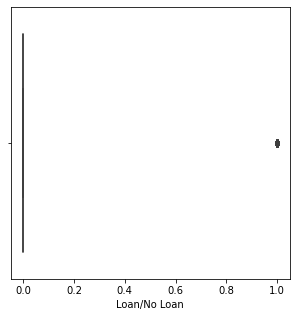

In [21]:
for i in df_train.columns:
    if df_train[i].dtype != 'object':
        plt.figure(figsize=(5,5))
        sns.boxplot(x = df_train[i],data= df_train)

In [22]:
df_train.head()

,ID,Asst_Reg,GGGrade,Experience,Validation,Yearly Income,Home Status,Unpaid 2 years,Already Defaulted,Designation,Debt to Income,Postal Code,Lend Amount,Deprecatory Records,Interest Charged,Usage Rate,Inquiries,Present Balance,Gross Collection,Sub GGGrade,File Status,State,Account Open,Total Unpaid CL,Duration,Unpaid Amount,Reason,Claim Type,Due Fee,Loan/No Loan
0,95074,421802,2,11,Verified,266640.00,MORGAGE,0,0,GLENDALE NISSAN,12.5496,91300.0,42023.25,0,15.39,88.924,3,607161.90,0.0,19.0,fully paid,California,17.0,58598.0,3.0,31216.05,debt consolidation,I,0.0,0
1,134131,3964312,4,7,Verified,85483.20,RENT,0,0,Business Teacher,9.0048,27400.0,38133.00,0,9.94,102.856,0,269234.06,0.0,30.0,whole,NC,15.0,18924.0,3.0,11660.49,debt consolidation,I,0.0,0
2,92602,4247560,3,0,Verified,79200.00,RENT,0,0,driver,24.9144,32800.0,17100.00,0,22.35,60.372,0,22476.53,0.0,25.0,whole,Florida,7.0,15604.0,3.0,5637.87,major purchase,I,0.0,0
3,22591,197179,3,0,Verified,61600.00,RENT,0,0,AvePoint,16.5816,7000.0,5130.00,0,10.36,116.272,1,15242.09,0.0,22.0,fully paid,NewJersey,9.0,22410.0,3.0,15607.17,major purchase,I,0.0,1
4,125060,4646684,5,2,Verified,68053.92,RENT,0,0,Lead Tester,40.0512,70800.0,19665.00,0,13.68,127.280,1,65433.94,0.0,32.0,fully paid,LA,10.0,36022.0,3.0,27472.86,debt consolidation,I,0.0,0


In [23]:
for i in df_train.columns:
    if df_train[i].dtype == 'object':
        print(i)
        print(df_train[i].unique())
        print(pd.Categorical(df_train[i]).unique().codes, '\n')
        df_train[i] = pd.Categorical(df_train[i]).codes

Validation
['Verified' 'Not Verified']
[0 1] 

Home Status
['MORGAGE' 'RENT']
[0 1] 

Designation
['GLENDALE NISSAN' 'Business Teacher' 'driver' ... 'Interface Coordinator'
 'PARTS CLERK' 'Outside sales rep']
[    0     1     2 ... 40351 40352 40353] 

File Status
['fully paid' 'whole']
[0 1] 

State
['California' 'NC' 'Florida' 'NewJersey' 'LA' 'TX' 'CT' 'MI' 'OR' 'AR'
 'Newyork' 'MT' 'CO' 'Ohio' 'NM' 'MN' 'GA' 'WA' 'Maryland' 'AL' 'SC' 'PA'
 'AZ' 'UT' 'MA' 'VA' 'IL' 'WI' 'NV' 'HI' 'RI' 'TN' 'OK' 'VT' 'IN' 'AK'
 'MO' 'NE' 'NH' 'DC' 'WV' 'MS' 'KY' 'KS' 'DE' 'ND' 'SD' 'WY' 'ME']
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48] 

Reason
['debt  consolidation' 'major  purchase' 'other' 'credit  card' 'car'
 'home  improvement' 'small  business' 'moving' 'vacation' 'medical'
 'wedding' 'house' 'renewable  energy']
[ 0  1  2  3  4  5  6  7  8  9 10 11 12] 

Claim Type
['I' 'J']
[0 1] 



In [24]:
df_train.head()

,ID,Asst_Reg,GGGrade,Experience,Validation,Yearly Income,Home Status,Unpaid 2 years,Already Defaulted,Designation,Debt to Income,Postal Code,Lend Amount,Deprecatory Records,Interest Charged,Usage Rate,Inquiries,Present Balance,Gross Collection,Sub GGGrade,File Status,State,Account Open,Total Unpaid CL,Duration,Unpaid Amount,Reason,Claim Type,Due Fee,Loan/No Loan
0,95074,421802,2,11,1,266640.00,0,0,0,12862,12.5496,91300.0,42023.25,0,15.39,88.924,3,607161.90,0.0,19.0,0,6,17.0,58598.0,3.0,31216.05,2,0,0.0,0
1,134131,3964312,4,7,1,85483.20,1,0,0,4177,9.0048,27400.0,38133.00,0,9.94,102.856,0,269234.06,0.0,30.0,1,25,15.0,18924.0,3.0,11660.49,2,0,0.0,0
2,92602,4247560,3,0,1,79200.00,1,0,0,36009,24.9144,32800.0,17100.00,0,22.35,60.372,0,22476.53,0.0,25.0,1,9,7.0,15604.0,3.0,5637.87,5,0,0.0,0
3,22591,197179,3,0,1,61600.00,1,0,0,2918,16.5816,7000.0,5130.00,0,10.36,116.272,1,15242.09,0.0,22.0,0,31,9.0,22410.0,3.0,15607.17,5,0,0.0,1
4,125060,4646684,5,2,1,68053.92,1,0,0,16887,40.0512,70800.0,19665.00,0,13.68,127.280,1,65433.94,0.0,32.0,0,16,10.0,36022.0,3.0,27472.86,2,0,0.0,0


In [25]:
df_train.drop(['ID','Postal Code'],axis=1,inplace=True)

In [26]:
df_train.head()

,Asst_Reg,GGGrade,Experience,Validation,Yearly Income,Home Status,Unpaid 2 years,Already Defaulted,Designation,Debt to Income,Lend Amount,Deprecatory Records,Interest Charged,Usage Rate,Inquiries,Present Balance,Gross Collection,Sub GGGrade,File Status,State,Account Open,Total Unpaid CL,Duration,Unpaid Amount,Reason,Claim Type,Due Fee,Loan/No Loan
0,421802,2,11,1,266640.00,0,0,0,12862,12.5496,42023.25,0,15.39,88.924,3,607161.90,0.0,19.0,0,6,17.0,58598.0,3.0,31216.05,2,0,0.0,0
1,3964312,4,7,1,85483.20,1,0,0,4177,9.0048,38133.00,0,9.94,102.856,0,269234.06,0.0,30.0,1,25,15.0,18924.0,3.0,11660.49,2,0,0.0,0
2,4247560,3,0,1,79200.00,1,0,0,36009,24.9144,17100.00,0,22.35,60.372,0,22476.53,0.0,25.0,1,9,7.0,15604.0,3.0,5637.87,5,0,0.0,0
3,197179,3,0,1,61600.00,1,0,0,2918,16.5816,5130.00,0,10.36,116.272,1,15242.09,0.0,22.0,0,31,9.0,22410.0,3.0,15607.17,5,0,0.0,1
4,4646684,5,2,1,68053.92,1,0,0,16887,40.0512,19665.00,0,13.68,127.280,1,65433.94,0.0,32.0,0,16,10.0,36022.0,3.0,27472.86,2,0,0.0,0


In [27]:
df_test = pd.read_csv('Data_Test.csv')

In [28]:
df_test.head()

,ID,Asst_Reg,GGGrade,Experience,Validation,Yearly Income,Home Status,Unpaid 2 years,Already Defaulted,Designation,Debt to Income,Postal Code,Lend Amount,Deprecatory Records,Interest Charged,Usage Rate,Inquiries,Present Balance,Gross Collection,Sub GGGrade,File Status,State,Account Open,Total Unpaid CL,Duration,Unpaid Amount,Reason,Claim Type,Due Fee
0,198980,1773284,II,2yrs,Source Verified,140800.00,OWN,0,0,processor,16.9176,90600.0,17955.00,0,8.88,78.432,1,59769.30,0.0,17,fully paid,California,23,33532.0,3 years,15755.94,major purchase,I,0.0
1,167688,5298273,II,>10yrs,Vfied,146080.00,MOR??AGE,0,0,Speech Language Pathologist,28.6944,32300.0,59850.00,0,10.10,76.368,1,532962.13,0.0,19,whole,Florida,17,149234.0,5 years,68237.55,debt consolidation,I,0.0
2,198768,189781,VI,>10yrs,Vfied,202222.24,MOR??AGE,0,0,Raytheon,51.1560,88000.0,59850.00,0,19.30,157.552,2,288816.48,0.0,37,whole,NM,15,70218.0,5 years,66272.76,debt consolidation,I,0.0
3,192564,1530906,II,>10yrs,Vfied,105600.00,MOR??AGE,1,0,Computer/Network Technician,27.0144,19900.0,19323.00,0,8.82,32.852,2,424664.30,0.0,19,fully paid,DE,18,79182.0,3 years,15595.20,credit card,I,0.0
4,151199,4410316,III,4yrs,Not Vfied,151360.00,MOR??AGE,0,0,NDE Tech,10.3824,34900.0,25350.75,1,13.52,108.532,1,251704.07,0.0,25,fully paid,Florida,7,13612.0,3 years,8850.96,debt consolidation,I,0.0


In [29]:
df_test.shape

(37500, 29)

In [30]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37500 entries, 0 to 37499
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   37500 non-null  int64  
 1   Asst_Reg             37500 non-null  int64  
 2   GGGrade              37500 non-null  object 
 3   Experience           37500 non-null  object 
 4   Validation           37500 non-null  object 
 5   Yearly Income        35075 non-null  float64
 6   Home Status          37500 non-null  object 
 7   Unpaid 2 years       37500 non-null  int64  
 8   Already Defaulted    37500 non-null  int64  
 9   Designation          36914 non-null  object 
 10  Debt to Income       35989 non-null  float64
 11  Postal Code          36889 non-null  float64
 12  Lend Amount          37500 non-null  float64
 13  Deprecatory Records  37500 non-null  int64  
 14  Interest Charged     37500 non-null  float64
 15  Usage Rate           37500 non-null 

In [31]:
for i in df_test.columns:
    if df_test[i].dtype == 'object':
        print(i)
        print(df_test[i].unique(),'\n')

GGGrade
['II' 'VI' 'III' 'V' 'IV' 'I' 'VII'] 

Experience
['2yrs' '>10yrs' '4yrs' '9yrs' '1yrs' '<1yr' '3yrs' '5yrs' '8yrs' '7yrs'
 '6yrs'] 

Validation
['Source Verified' 'Vfied' 'Not Vfied'] 

Home Status
['OWN' 'MOR??AGE' 'REN?' 'NONE' 'OTHER'] 

Designation
['processor' 'Speech Language Pathologist' 'Raytheon' ...
 'Parade Performer' 'Sr. Chemistry Technician' 'ParaEducator'] 

File Status
['fully paid' 'whole'] 

State
['California' 'Florida' 'NM' 'DE' 'Newyork' 'IL' 'GA' 'NH' 'MO' 'PA' 'MI'
 'IN' 'TX' 'NV' 'NC' 'KS' 'OR' 'CO' 'NewJersey' 'CT' 'Maryland' 'TN' 'WI'
 'UT' 'Ohio' 'MN' 'AL' 'AZ' 'WA' 'MS' 'LA' 'HI' 'WV' 'OK' 'KY' 'VA' 'SD'
 'MA' 'NE' 'RI' 'SC' 'AK' 'AR' 'MT' 'DC' 'VT' 'WY' 'ND' 'ME'] 

Duration
['3 years' '5 years'] 

Reason
['major  purchase' 'debt  consolidation' 'credit  card' 'other'
 'home  improvement' 'house' 'medical' 'small  business' 'vacation'
 'moving' 'car' 'wedding' 'renewable  energy'] 

Claim Type
['I' 'J'] 



In [32]:
df_test['GGGrade'] = df_test['GGGrade'].map({'I':1,'II':2,'III':3,'IV':4,'V':5,'VI':6,'VII':7})
df_test['Experience'] = df_test['Experience'].map({'<1yr': 0,'1yrs': 1,'2yrs': 2,'3yrs': 3, '4yrs': 4, '5yrs': 5, '6yrs': 6,
                                                    '7yrs': 7, '8yrs': 8, '9yrs': 9,'>10yrs': 11})
df_test['Validation'] = df_test['Validation'].map({'Vfied':'Verified','Not Vfied': 'Not Verified'})
df_test['Home Status'] = df_test['Home Status'].map({'MOR??AGE': 'MORGAGE','REN?': 'RENT'})
df_test['Duration'] = df_test['Duration'].map({'3 years' : 3,' 5 years': 5})

In [33]:
df_test.dtypes

ID                       int64
Asst_Reg                 int64
GGGrade                  int64
Experience               int64
Validation              object
Yearly Income          float64
Home Status             object
Unpaid 2 years           int64
Already Defaulted        int64
Designation             object
Debt to Income         float64
Postal Code            float64
Lend Amount            float64
Deprecatory Records      int64
Interest Charged       float64
Usage Rate             float64
Inquiries                int64
Present Balance        float64
Gross Collection       float64
Sub GGGrade              int64
File Status             object
State                   object
Account Open             int64
Total Unpaid CL        float64
Duration               float64
Unpaid Amount          float64
Reason                  object
Claim Type              object
Due Fee                float64
dtype: object

In [34]:
df_test.isnull().sum()

ID                         0
Asst_Reg                   0
GGGrade                    0
Experience                 0
Validation             14646
Yearly Income           2425
Home Status             3596
Unpaid 2 years             0
Already Defaulted          0
Designation              586
Debt to Income          1511
Postal Code              611
Lend Amount                0
Deprecatory Records        0
Interest Charged           0
Usage Rate                 0
Inquiries                  0
Present Balance            0
Gross Collection           0
Sub GGGrade                0
File Status                0
State                      0
Account Open               0
Total Unpaid CL         1814
Duration               11691
Unpaid Amount           2069
Reason                     0
Claim Type                 0
Due Fee                    0
dtype: int64

In [35]:
df_test['Designation'] = df_test['Designation'].replace(np.NaN, df_test['Designation'].mode()[0])
df_test['Validation'] = df_test['Validation'].replace(np.NaN,df_test['Validation'].mode()[0])
df_test['Home Status'] = df_test['Home Status'].replace(np.NaN,df_test['Home Status'].mode()[0])
df_test['Duration'] = df_test['Duration'].replace(np.NaN, df_test['Duration'].mode()[0])
df_test['Postal Code'] = df_test['Postal Code'].replace(np.NaN, df_test['Postal Code'].mode()[0])

In [36]:
df_test.describe()

,ID,Asst_Reg,GGGrade,Experience,Yearly Income,Unpaid 2 years,Already Defaulted,Debt to Income,Postal Code,Lend Amount,Deprecatory Records,Interest Charged,Usage Rate,Inquiries,Present Balance,Gross Collection,Sub GGGrade,Account Open,Total Unpaid CL,Duration,Unpaid Amount,Due Fee
count,37500.000000,3.750000e+04,37500.000000,37500.000000,3.507500e+04,37500.000000,37500.000000,35989.00000,37500.000000,37500.000000,37500.000000,37500.000000,37500.000000,37500.000000,3.750000e+04,37500.000000,37500.000000,37500.000000,3.568600e+04,37500.0,3.543100e+04,37500.000000
mean,184143.867973,3.804858e+06,2.815200,6.432213,1.340308e+05,0.336427,0.005307,30.91903,51621.173333,25828.004160,0.200080,16.511014,95.259109,0.676640,2.353528e+05,39.484071,22.031467,12.777787,5.344820e+04,3.0,2.928066e+04,0.309792
std,21683.224387,2.284115e+06,1.310359,4.046744,1.000845e+05,0.887640,0.077966,13.87167,31140.490563,14402.061788,0.563137,4.912595,40.493219,0.964515,2.543097e+05,364.114581,6.481257,5.360527,5.215483e+04,0.0,3.560849e+04,3.396315
min,146560.000000,3.752200e+04,1.000000,0.000000,8.800000e+03,0.000000,0.000000,0.00000,1000.000000,1710.000000,0.000000,8.000000,0.000000,0.000000,0.000000e+00,0.000000,11.000000,2.000000,3.320000e+02,3.0,0.000000e+00,0.000000
25%,165341.250000,1.495828e+06,2.000000,3.000000,8.419400e+04,0.000000,0.000000,20.47920,23300.000000,14919.750000,0.000000,12.250000,65.532000,0.000000,5.129572e+04,0.000000,17.000000,9.000000,2.324000e+04,3.0,1.141425e+04,0.000000
50%,184257.000000,4.134010e+06,3.000000,7.000000,1.144000e+05,0.000000,0.000000,30.18960,48100.000000,23811.750000,0.000000,16.515000,96.492000,0.000000,1.383795e+05,0.000000,21.000000,12.000000,3.950800e+04,3.0,2.068074e+04,0.000000
75%,202869.250000,5.934898e+06,4.000000,11.000000,1.584000e+05,0.000000,0.000000,40.72320,80100.000000,34200.000000,0.000000,20.770000,126.764000,1.000000,3.514983e+05,0.000000,26.000000,15.000000,6.640000e+04,3.0,3.618446e+04,0.000000
max,221557.000000,7.351969e+06,7.000000,11.000000,8.800000e+06,18.000000,3.000000,116.50800,99900.000000,59850.000000,21.000000,25.000000,254.560000,6.000000,4.909890e+06,13900.000000,45.000000,60.000000,1.475408e+06,3.0,1.535830e+06,131.490000


In [37]:
df_test['Yearly Income'] =  df_test['Yearly Income'].replace(np.NaN,df_test['Yearly Income'].median())
df_test['Debt to Income'] = df_test['Debt to Income'].replace(np.NaN, df_test['Debt to Income'].mean())
df_test['Total Unpaid CL'] = df_test['Total Unpaid CL'].replace(np.NaN,df_test['Total Unpaid CL'].median())
df_test['Unpaid Amount'] = df_test['Unpaid Amount'].replace(np.NaN,df_test['Unpaid Amount'].median())

<ipython-input-38-2e4573a1cfef>:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(5,5))


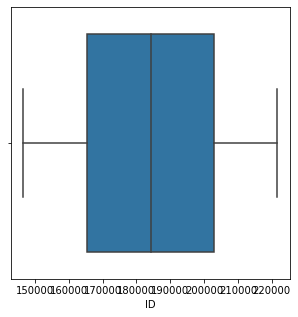

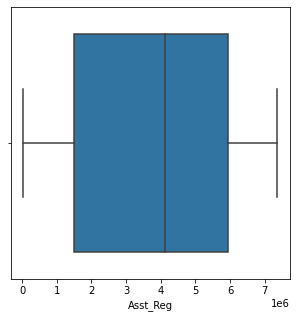

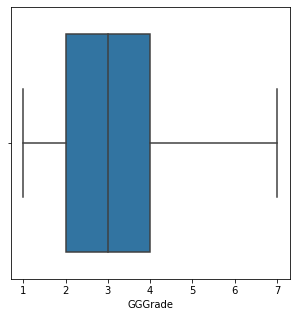

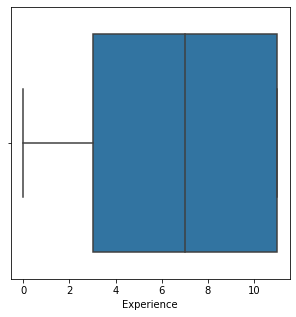

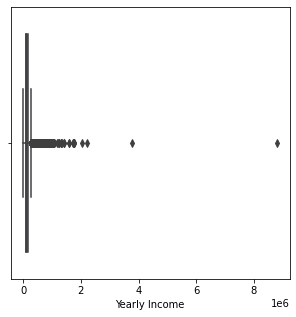

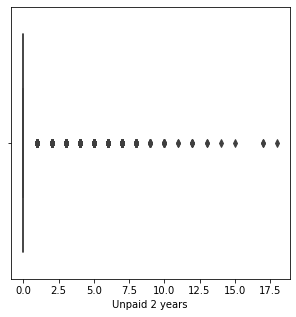

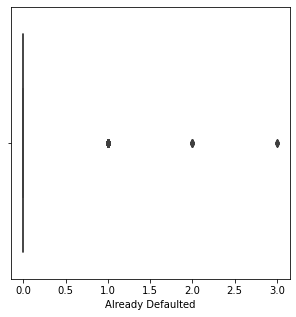

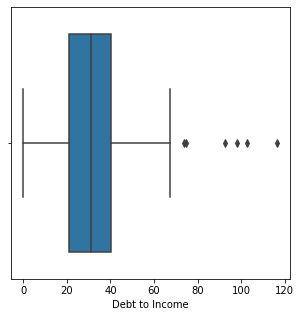

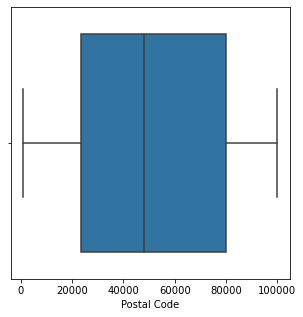

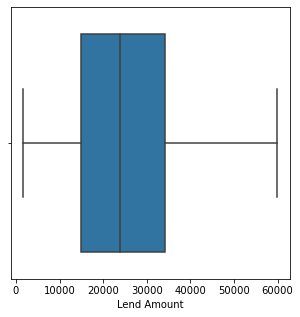

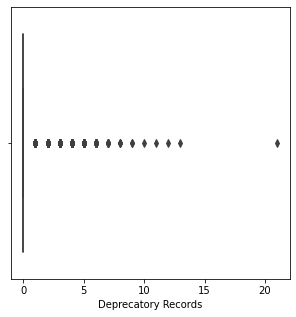

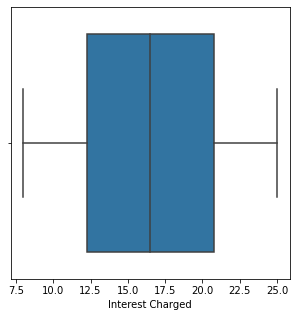

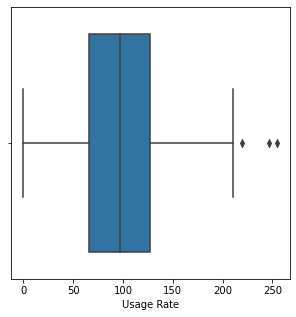

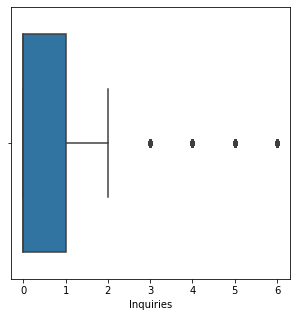

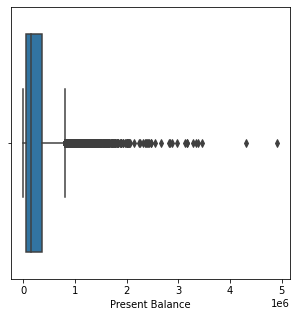

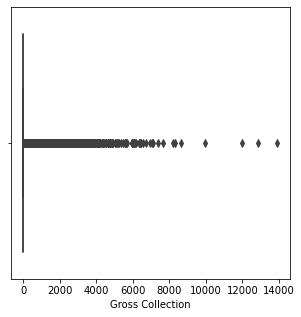

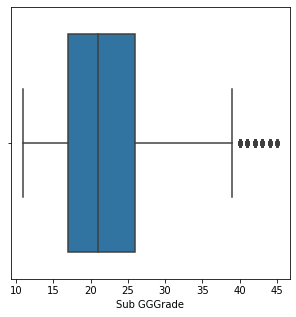

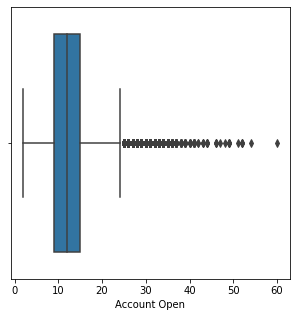

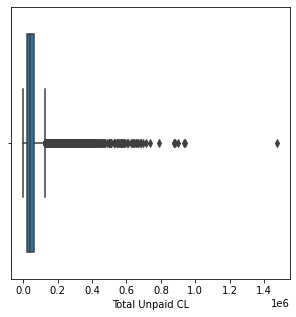

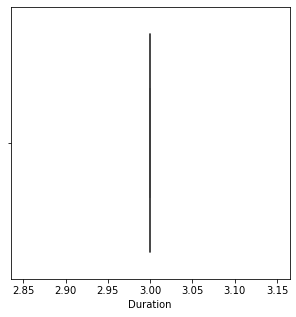

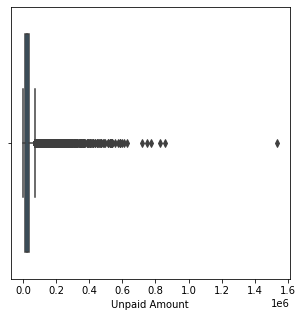

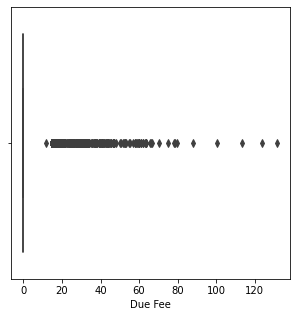

In [38]:
for i in df_test.columns:
    if df_test[i].dtype != 'object':
        plt.figure(figsize=(5,5))
        sns.boxplot(x = df_test[i],data= df_test)

In [39]:
def remove_outliers(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 -Q1
    lr = Q1 - (1.5 * IQR)
    ur = Q3 + (1.5 * IQR)
    return lr, ur 

In [40]:
for i in df_test[['Yearly Income','Debt to Income','Usage Rate','Sub GGGrade','Account Open','Unpaid Amount']]:
    lr, ur = remove_outliers(df_test[i])
    df_test[i] = np.where(df_test[i]< lr, lr, df_test[i])
    df_test[i] = np.where(df_test[i]> ur, ur, df_test[i])

<ipython-input-41-2e4573a1cfef>:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(5,5))


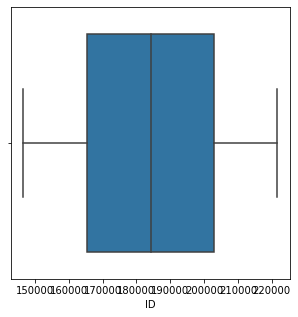

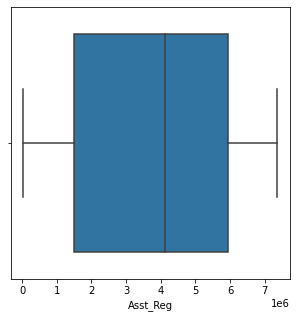

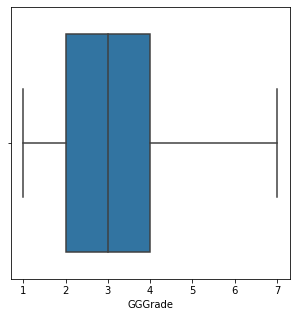

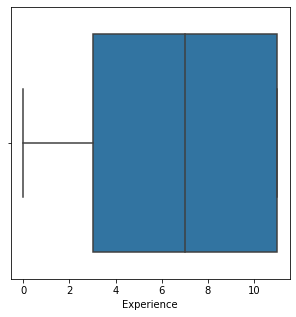

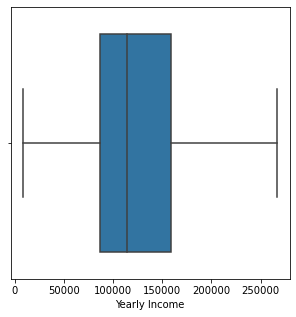

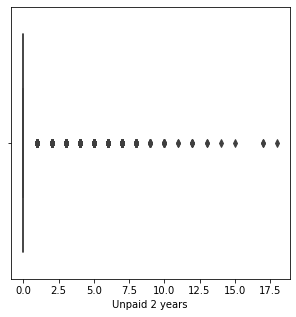

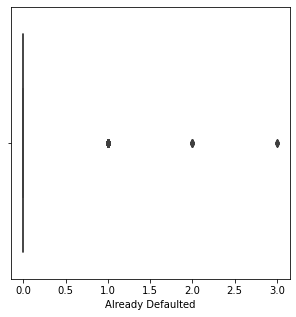

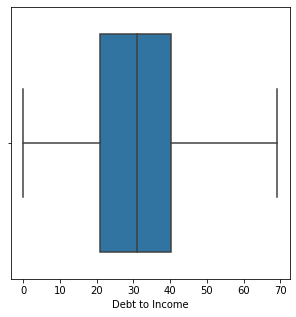

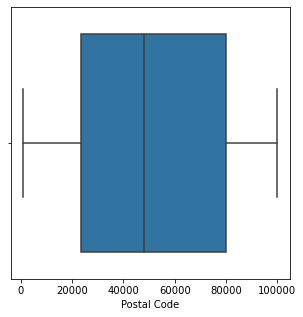

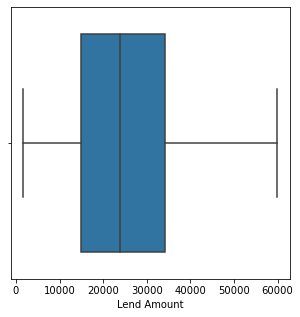

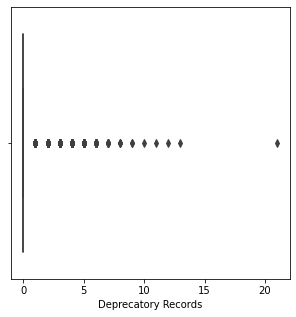

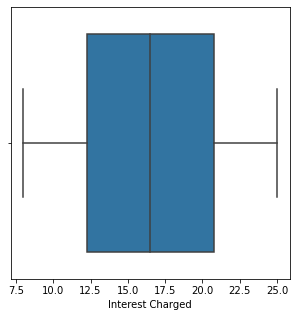

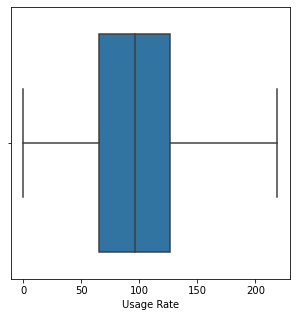

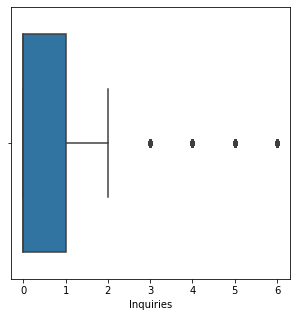

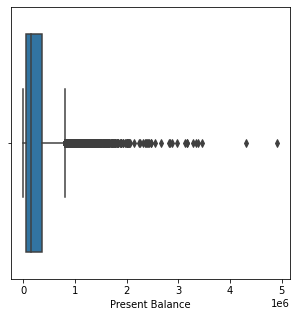

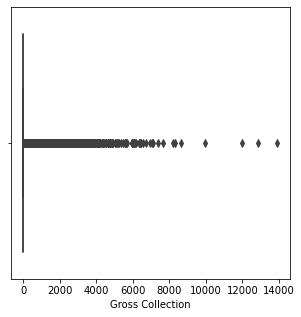

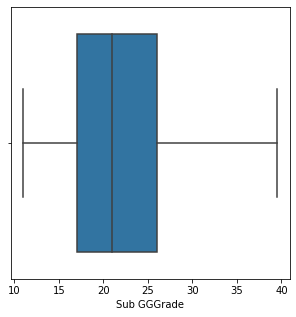

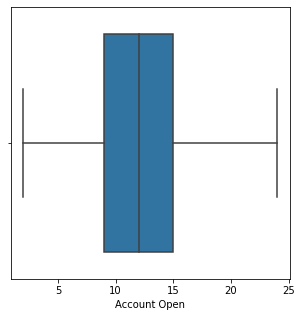

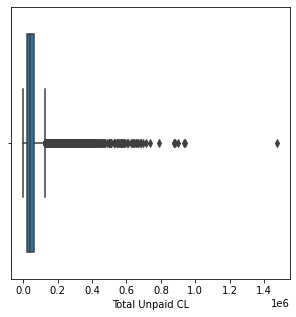

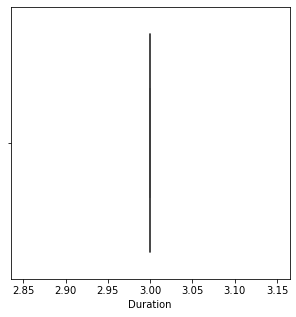

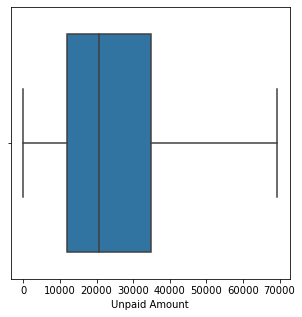

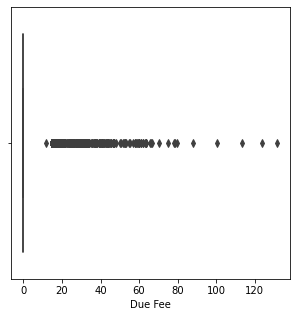

In [41]:
for i in df_test.columns:
    if df_test[i].dtype != 'object':
        plt.figure(figsize=(5,5))
        sns.boxplot(x = df_test[i],data= df_test)

In [42]:
for i in df_test.columns:
    if df_test[i].dtype == 'object':
        print(i)
        print(df_test[i].unique())
        print(pd.Categorical(df_test[i]).unique().codes, '\n')
        df_test[i] = pd.Categorical(df_test[i]).codes

Validation
['Not Verified' 'Verified']
[0 1] 

Home Status
['MORGAGE' 'RENT']
[0 1] 

Designation
['processor' 'Speech Language Pathologist' 'Raytheon' ...
 'Parade Performer' 'Sr. Chemistry Technician' 'ParaEducator']
[    0     1     2 ... 19507 19508 19509] 

File Status
['fully paid' 'whole']
[0 1] 

State
['California' 'Florida' 'NM' 'DE' 'Newyork' 'IL' 'GA' 'NH' 'MO' 'PA' 'MI'
 'IN' 'TX' 'NV' 'NC' 'KS' 'OR' 'CO' 'NewJersey' 'CT' 'Maryland' 'TN' 'WI'
 'UT' 'Ohio' 'MN' 'AL' 'AZ' 'WA' 'MS' 'LA' 'HI' 'WV' 'OK' 'KY' 'VA' 'SD'
 'MA' 'NE' 'RI' 'SC' 'AK' 'AR' 'MT' 'DC' 'VT' 'WY' 'ND' 'ME']
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48] 

Reason
['major  purchase' 'debt  consolidation' 'credit  card' 'other'
 'home  improvement' 'house' 'medical' 'small  business' 'vacation'
 'moving' 'car' 'wedding' 'renewable  energy']
[ 0  1  2  3  4  5  6  7  8  9 10 11 12] 

Claim Type
['I' 'J']
[0

In [72]:
test_file_ids = df_test['ID']

In [73]:
df_test.drop(['ID','Postal Code'],axis=1,inplace=True)

In [43]:
X = df_train.drop('Loan/No Loan',axis=1)
y = df_train['Loan/No Loan']

In [44]:
from sklearn.model_selection import train_test_split

In [48]:
from sklearn.tree import DecisionTreeClassifier

In [49]:
dt_model = DecisionTreeClassifier()

In [50]:
dt_model.fit(Xtrain,ytrain)

DecisionTreeClassifier()

In [51]:
from sklearn import tree

train_char_label = ['No', 'Yes']
ld_Tree_File = open('ld_Tree_File.dot','w')
dot_data = tree.export_graphviz(dt_model, 
                                out_file=ld_Tree_File, 
                                feature_names = list(X), 
                                class_names = list(train_char_label))

ld_Tree_File.close()


In [51]:
from sklearn import metrics

In [45]:
from sklearn.model_selection import train_test_split
Xtrain, X_validation, ytrain, y_validation = train_test_split(X,y,test_size = 0.3,random_state = 0)

In [52]:
ytrain_predict = dt_model.predict(Xtrain)
ytest_predict = dt_model.predict(X_validation)

In [53]:
dt_acc_train = metrics.accuracy_score(ytrain,ytrain_predict)
dt_acc_test = metrics.accuracy_score(y_validation,ytest_predict)
print(dt_acc_train)
print(dt_acc_test)

1.0
0.7609523809523809


In [54]:
print(metrics.classification_report(ytrain,ytrain_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     49710
           1       1.00      1.00      1.00     11540

    accuracy                           1.00     61250
   macro avg       1.00      1.00      1.00     61250
weighted avg       1.00      1.00      1.00     61250



In [55]:
print(metrics.classification_report(y_validation,ytest_predict))

              precision    recall  f1-score   support

           0       0.86      0.85      0.85     21278
           1       0.38      0.39      0.38      4972

    accuracy                           0.76     26250
   macro avg       0.62      0.62      0.62     26250
weighted avg       0.77      0.76      0.76     26250



In [56]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100,criterion='gini',max_depth=20,max_features=10)
rf_model.fit(Xtrain,ytrain)

y_pred_train = rf_model.predict(Xtrain)
y_pred_val = rf_model.predict(X_validation)

In [57]:
rf_acc_train = metrics.accuracy_score(ytrain,y_pred_train)
rf_acc_val = metrics.accuracy_score(y_validation,y_pred_val)
print(rf_acc_train)
print(rf_acc_val)

0.978530612244898
0.8359619047619048


In [58]:
print(metrics.classification_report(ytrain,y_pred_train))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99     49710
           1       1.00      0.89      0.94     11540

    accuracy                           0.98     61250
   macro avg       0.99      0.94      0.96     61250
weighted avg       0.98      0.98      0.98     61250



In [59]:
print(metrics.classification_report(y_validation,y_pred_val))

              precision    recall  f1-score   support

           0       0.85      0.97      0.91     21278
           1       0.67      0.26      0.38      4972

    accuracy                           0.84     26250
   macro avg       0.76      0.62      0.64     26250
weighted avg       0.82      0.84      0.81     26250



In [62]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [7,20],
    'max_features': [6,8],
    'min_samples_leaf': [875,2625],
    'min_samples_split': [2625,7875],
    'n_estimators': [300,500]
}

rfcl = RandomForestClassifier(random_state=0)

grid_search = GridSearchCV(estimator = rfcl, param_grid = param_grid, cv = 10)

In [63]:
grid_search.fit(Xtrain, ytrain)

KeyboardInterrupt: 

In [66]:
from sklearn.linear_model import LogisticRegression

In [67]:
model1 = LogisticRegression(solver='newton-cg', max_iter=10000, penalty = 'none',verbose = True,n_jobs=2)
model1.fit(Xtrain, ytrain)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:  2.5min finished


LogisticRegression(max_iter=10000, n_jobs=2, penalty='none', solver='newton-cg',
                   verbose=True)

In [68]:
ytrain_predict = model1.predict(Xtrain)
ytest_predict = model1.predict(X_validation)

In [69]:
lr_acc_train = metrics.accuracy_score(ytrain,ytrain_predict)
lr_acc_val = metrics.accuracy_score(y_validation,ytest_predict)
print(lr_acc_train)
print(lr_acc_val)

0.8312816326530612
0.8328761904761904


In [70]:
print(metrics.classification_report(ytrain,ytrain_predict))

              precision    recall  f1-score   support

           0       0.85      0.96      0.90     49710
           1       0.62      0.27      0.38     11540

    accuracy                           0.83     61250
   macro avg       0.73      0.62      0.64     61250
weighted avg       0.81      0.83      0.80     61250



In [71]:
print(metrics.classification_report(y_validation,ytest_predict))

              precision    recall  f1-score   support

           0       0.85      0.96      0.90     21278
           1       0.64      0.28      0.38      4972

    accuracy                           0.83     26250
   macro avg       0.74      0.62      0.64     26250
weighted avg       0.81      0.83      0.81     26250



In [69]:
from sklearn.model_selection import GridSearchCV

In [66]:
grid = {'penalty': ['l2', 'none'],
       'solver':['sag','Ibfgs','newton-cg'],
       'tol': [0.0001,0.00001]}

In [67]:
model_grid = LogisticRegression(max_iter=10000,n_jobs=2)

In [70]:
grid_search = GridSearchCV(estimator=model_grid, param_grid= grid,cv=3,n_jobs=1)

In [46]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [47]:
#Build LDA Model
clf = LinearDiscriminantAnalysis()
model=clf.fit(Xtrain,ytrain)

In [49]:
# Training Data Class Prediction with a cut-off value of 0.5
pred_class_train = model.predict(Xtrain)

# Test Data Class Prediction with a cut-off value of 0.5
pred_class_test = model.predict(X_validation)

In [52]:
ld_acc_train = metrics.accuracy_score(ytrain,pred_class_train)
ld_acc_val = metrics.accuracy_score(y_validation,pred_class_test)
print(ld_acc_train)
print(ld_acc_val)

0.8293551020408163
0.8315809523809524


In [53]:
print(metrics.classification_report(ytrain,pred_class_train))

              precision    recall  f1-score   support

           0       0.85      0.96      0.90     49710
           1       0.61      0.27      0.37     11540

    accuracy                           0.83     61250
   macro avg       0.73      0.61      0.64     61250
weighted avg       0.80      0.83      0.80     61250



In [54]:
print(metrics.classification_report(y_validation,pred_class_test))

              precision    recall  f1-score   support

           0       0.85      0.96      0.90     21278
           1       0.63      0.27      0.38      4972

    accuracy                           0.83     26250
   macro avg       0.74      0.62      0.64     26250
weighted avg       0.81      0.83      0.80     26250



In [55]:
from sklearn.neural_network import MLPClassifier

In [56]:
from sklearn.preprocessing import StandardScaler

In [57]:
sc = StandardScaler()

In [58]:
X_train_scaled = sc.fit_transform(Xtrain)
X_validation_scaled = sc.fit_transform(X_validation)

In [59]:
clf = MLPClassifier(hidden_layer_sizes=200, max_iter=10000,
                     solver='sgd', verbose=True,  random_state=0,tol=0.01)

In [60]:
clf.fit(X_train_scaled,ytrain)

Iteration 1, loss = 0.48627042
Iteration 2, loss = 0.41336265
Iteration 3, loss = 0.39593150
Iteration 4, loss = 0.38816838
Iteration 5, loss = 0.38415613
Iteration 6, loss = 0.38184348
Iteration 7, loss = 0.38037336
Iteration 8, loss = 0.37938303
Iteration 9, loss = 0.37863621
Iteration 10, loss = 0.37803402
Iteration 11, loss = 0.37754406
Iteration 12, loss = 0.37709863
Iteration 13, loss = 0.37671549
Iteration 14, loss = 0.37636730
Training loss did not improve more than tol=0.010000 for 10 consecutive epochs. Stopping.


MLPClassifier(hidden_layer_sizes=200, max_iter=10000, random_state=0,
              solver='sgd', tol=0.01, verbose=True)

In [62]:
y_pred_train = clf.predict(X_train_scaled)

In [63]:
y_pred_test = clf.predict(X_validation_scaled)

In [64]:
print(metrics.classification_report(ytrain,y_pred_train))

              precision    recall  f1-score   support

           0       0.85      0.96      0.90     49710
           1       0.61      0.27      0.37     11540

    accuracy                           0.83     61250
   macro avg       0.73      0.61      0.64     61250
weighted avg       0.80      0.83      0.80     61250



In [65]:
print(metrics.classification_report(y_validation,y_pred_test))

              precision    recall  f1-score   support

           0       0.85      0.96      0.90     21278
           1       0.61      0.27      0.38      4972

    accuracy                           0.83     26250
   macro avg       0.73      0.62      0.64     26250
weighted avg       0.80      0.83      0.80     26250



In [74]:
final_predictions = model1.predict(df_test)

In [75]:
final_predictions.shape

(37500,)

In [87]:
submission22 = pd.DataFrame([test_file_ids,final_predictions]).T

In [88]:
submission22.head()

,ID,Unnamed 0
0,198980,0
1,167688,0
2,198768,0
3,192564,0
4,151199,0


In [89]:
submission22.rename(columns={'Unnamed 0': 'Loan/No Loan'},inplace=True)

In [90]:
submission22.head()

,ID,Loan/No Loan
0,198980,0
1,167688,0
2,198768,0
3,192564,0
4,151199,0


In [92]:
submission22.to_csv('submission22.csv',index=False)